In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





/kaggle/input/global-inflation-data/global_inflation_data.csv


In [2]:
# Import dataset for Global Inflation from 1980 to 2024
df = r'/kaggle/input/global-inflation-data/global_inflation_data.csv'
df = pd.read_csv(df)

# Peak at the data and get statistical summary
print(df.head())
print(df.describe())
print(df.shape)

  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  2024  
0   5.44   5.

Can see there are some null values in earlier years for some countries.
Not a lot to be done just need to consider when analysing later.

In [3]:
# Wanted to look at US and UK inflation specifically - made two new datasets and tranposed so they could be used for plots easier

uk_inf = df[df['country_name'] == 'United Kingdom']
us_inf = df[df['country_name'] == 'United States']

uk_data = uk_inf.drop(columns=['country_name', 'indicator_name'])
us_data = us_inf.drop(columns=['country_name', 'indicator_name'])

# Transpose the dataframe
uk_data = uk_data.transpose().reset_index()
us_data = us_data.transpose().reset_index()

# uk_data.to_csv('US_inflation.csv')
# Rename the columns
uk_data.columns = ['Year', 'Inflation']
us_data.columns = ['Year', 'Inflation']

# Convert the 'Year' column to integer type
uk_data['Year'] = uk_data['Year'].astype(int)
us_data['Year'] = us_data['Year'].astype(int)

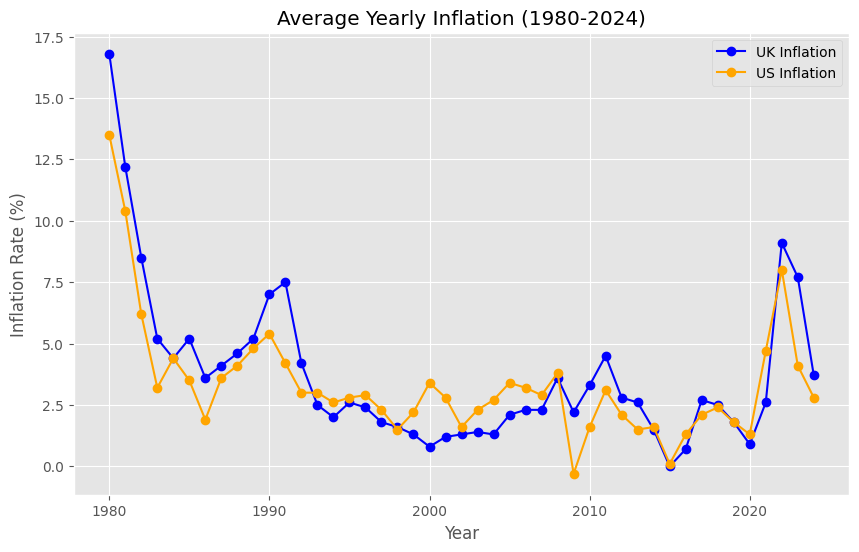

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(uk_data['Year'], uk_data['Inflation'], marker='o', color='blue', label='UK Inflation')
plt.plot(us_data['Year'], us_data['Inflation'], marker='o', color='orange', label='US Inflation')
plt.title('Average Yearly Inflation (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

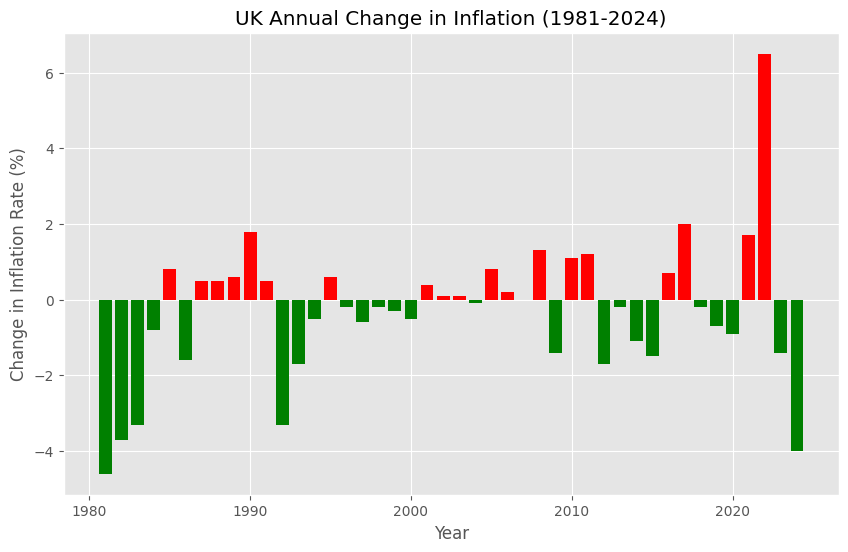

In [5]:
# Also want to look at a year-on-year change in inflation for each country:

uk_data['Inflation Change'] = uk_data['Inflation'].diff()

# Drop the first row with NaN value
uk_data = uk_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in uk_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(uk_data['Year'], uk_data['Inflation Change'], color=colors)
plt.title('UK Annual Change in Inflation (1981-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()


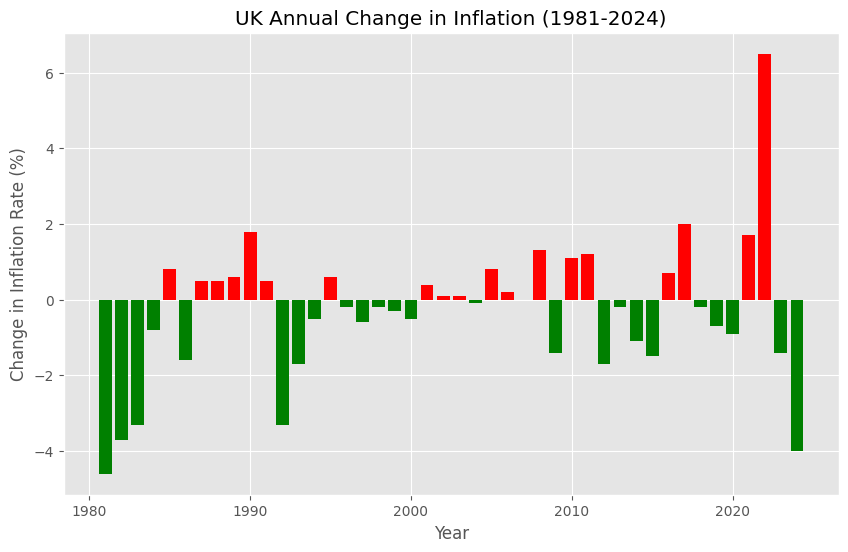

In [6]:
# Same again for US data

us_data['Inflation Change'] = us_data['Inflation'].diff()

# Drop the first row with NaN value
us_data = us_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in uk_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(uk_data['Year'], uk_data['Inflation Change'], color=colors)
plt.title('UK Annual Change in Inflation (1981-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()

In [7]:
# Also decided to look at China and Russia inflation. Re-using code from before

rs_inf = df[df['country_name'] == 'Russian Federation']
cn_inf = df[df['country_name'] == "China, People's Republic of"]

rs_data = rs_inf.drop(columns=['country_name', 'indicator_name'])
cn_data = cn_inf.drop(columns=['country_name', 'indicator_name'])

# Transpose the dataframe
rs_data = rs_data.transpose().reset_index()
cn_data = cn_data.transpose().reset_index()

# Rename the columns
rs_data.columns = ['Year', 'Inflation']
cn_data.columns = ['Year', 'Inflation']

# Convert the 'Year' column to integer type
rs_data['Year'] = rs_data['Year'].astype(int)
cn_data['Year'] = cn_data['Year'].astype(int)

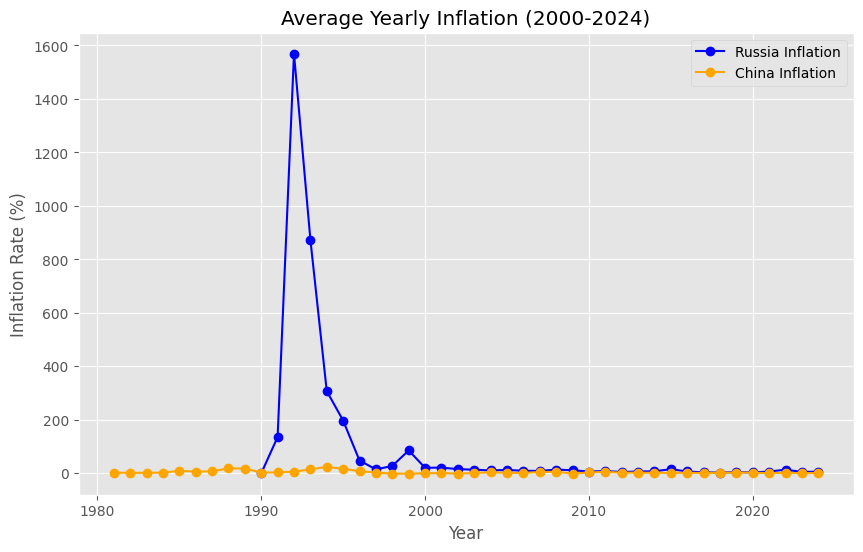

In [8]:
# Make similar plots for China + Russia
plt.figure(figsize=(10, 6))
plt.plot(rs_data['Year'], rs_data['Inflation'], marker='o', color='blue', label='Russia Inflation')
plt.plot(cn_data['Year'], cn_data['Inflation'], marker='o', color='orange', label='China Inflation')
plt.title('Average Yearly Inflation (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

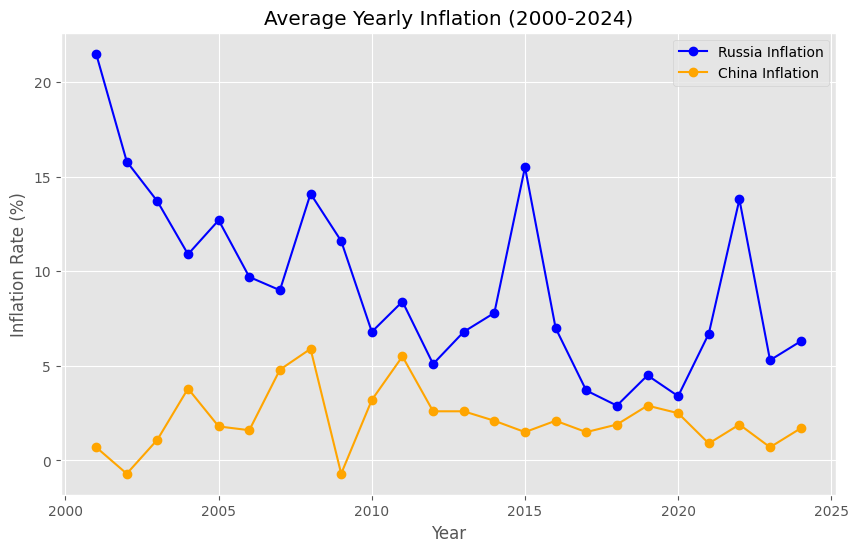

In [9]:
# Huge spikes in inflation in the 1990s for Russia, if want to compare need to look at period after this. 2000 onwards?

rs_data_2000 = rs_data[rs_data['Year'] > 2000]
cn_data_2000 = cn_data[cn_data['Year'] > 2000]

plt.figure(figsize=(10, 6))
plt.plot(rs_data_2000['Year'], rs_data_2000['Inflation'], marker='o', color='blue', label='Russia Inflation')
plt.plot(cn_data_2000['Year'], cn_data_2000['Inflation'], marker='o', color='orange', label='China Inflation')
plt.title('Average Yearly Inflation (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

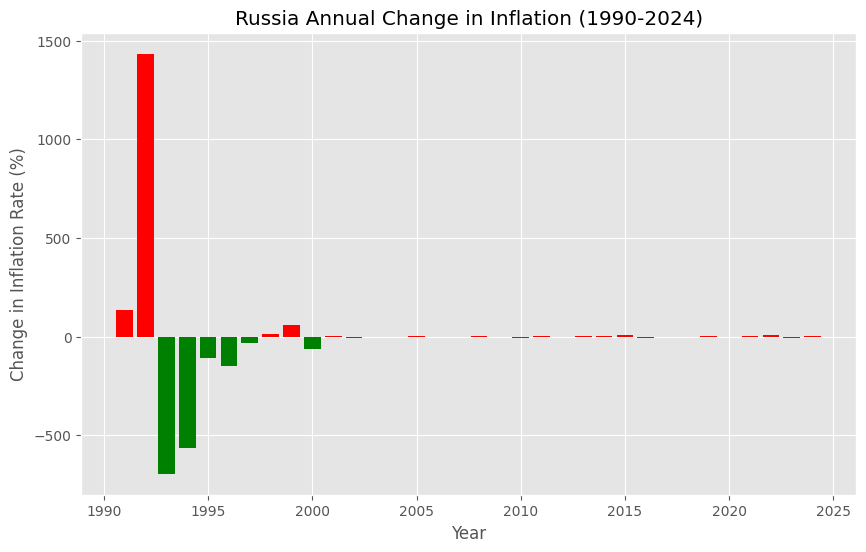

In [10]:
# Make year-on-year difference graphs for China and Russia re-using code from before

rs_data['Inflation Change'] = rs_data['Inflation'].diff()

# Drop the first row with NaN value
rs_data = rs_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in rs_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rs_data['Year'], rs_data['Inflation Change'], color=colors)
plt.title('Russia Annual Change in Inflation (1990-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()

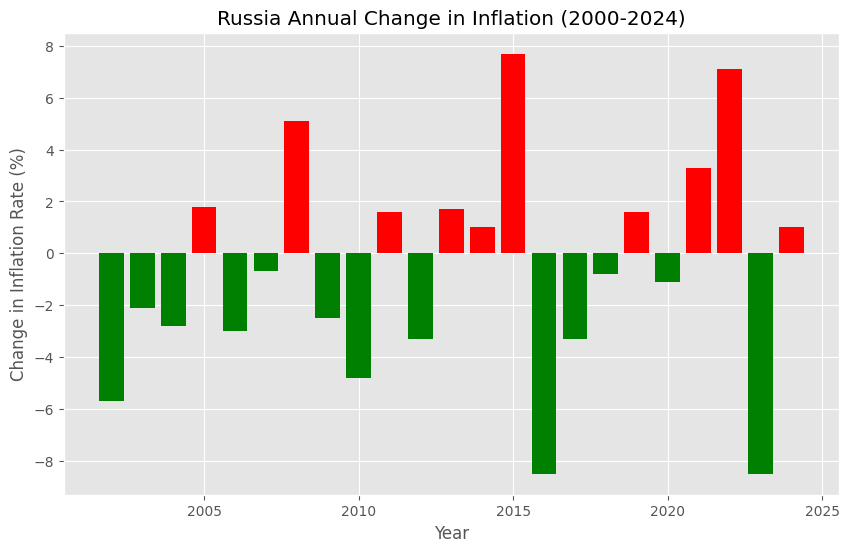

In [11]:
# Again, data is skewed due to 1990s. Will remove to get a clearer view post 2000.


rs_data_2000['Inflation Change'] = rs_data_2000['Inflation'].diff()

# Drop the first row with NaN value
rs_data_2000 = rs_data_2000.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in rs_data_2000['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rs_data_2000['Year'], rs_data_2000['Inflation Change'], color=colors)
plt.title('Russia Annual Change in Inflation (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()

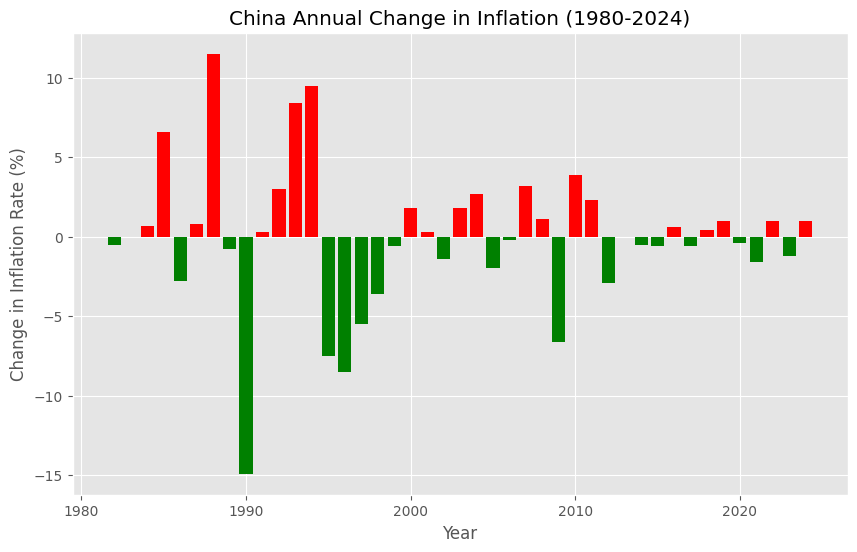

In [12]:
# Again, for China. Don't need to do post 2000s as not huge variance.

cn_data['Inflation Change'] = cn_data['Inflation'].diff()

# Drop the first row with NaN value
cn_data = cn_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in cn_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cn_data['Year'], cn_data['Inflation Change'], color=colors)
plt.title('China Annual Change in Inflation (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()



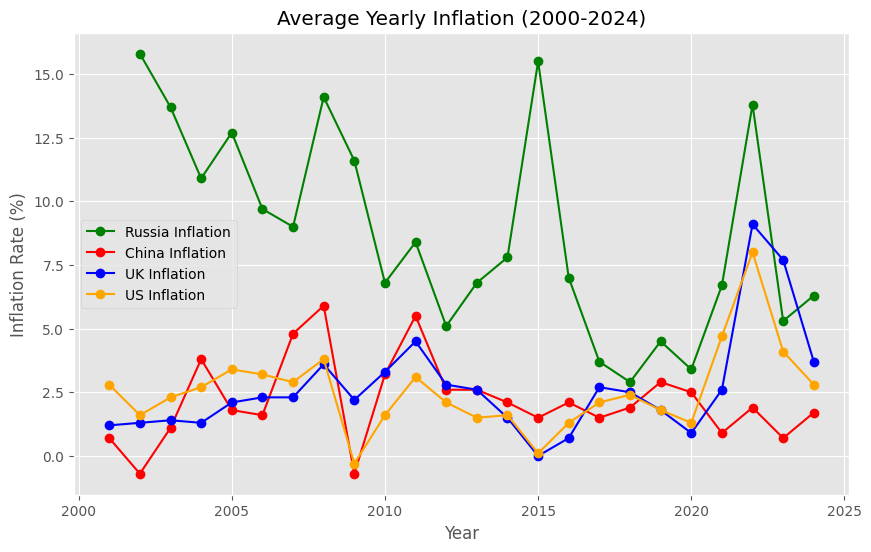

In [13]:
# Finally, put all 4 countries yearly inflation on same graph. Will look at post 2000s due to large variance in Russian inflation in 1990s.

uk_data_2000 = uk_data[uk_data['Year'] > 2000]
us_data_2000 = us_data[us_data['Year'] > 2000]

plt.figure(figsize=(10, 6))
plt.plot(rs_data_2000['Year'], rs_data_2000['Inflation'], marker='o', color='green', label='Russia Inflation')
plt.plot(cn_data_2000['Year'], cn_data_2000['Inflation'], marker='o', color='red', label='China Inflation')
plt.plot(uk_data_2000['Year'], uk_data_2000['Inflation'], marker='o', color='blue', label='UK Inflation')
plt.plot(us_data_2000['Year'], us_data_2000['Inflation'], marker='o', color='orange', label='US Inflation')
plt.title('Average Yearly Inflation (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()


Finally, here are some extra visualisations created using Tableau, showing global inflation by country in 2023 as well as change in inflation from 2022 to 2023.

In [14]:
%%HTML
<div class='tableauPlaceholder' id='viz1721924756396' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;BJ&#47;BJJM69SWZ&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;BJJM69SWZ' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;BJ&#47;BJJM69SWZ&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1721924756396');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='900px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>